<a href="https://colab.research.google.com/github/Kruglikle/My-labs_NLP_Complinguistics/blob/main/bert_KruglikovaLena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
! pip install razdel scikit-learn nltk pandas matplotlib seaborn transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
!pip install natasha

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 82.5 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=06a7328566cdbe377e3127342e9110abccddb0d2d314732cbab61b8a8f156949
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26098 sha256=3e9cb433153eedc102c136902d36023f1952a7bf0d8d469d1049ef41c0861aa9
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built docopt intervaltree


In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer #for bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression #классификатор
from sklearn.model_selection import train_test_split #обучатель
from sklearn.metrics import classification_report #метрики
from razdel import tokenize
from nltk.corpus import stopwords

import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import PCA

In [7]:
#load sber model
tokenizer = AutoTokenizer.from_pretrained('sberbank-ai/ruBert-base')
model = AutoModel.from_pretrained('sberbank-ai/ruBert-base')

config.json:   0%|          | 0.00/590 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/716M [00:00<?, ?B/s]

In [70]:
!pip install datasets

In [71]:
data = {
    'text': [
        'Книга скучная!',
        'Ужасная книга, зря потратила время.',
        'Отличный сюжет, герои великолепны.',
        'Скучный сюжет, неинтересно.',
        'Замечательная книга, вдохновляет.',
        'Плохо, не советую читать.',
        'Книга очень интересная, всем советую!'
    ],
    'label': [0, 0, 1, 0, 1, 0, 1]  #1: positive, 0: negative
}
df = pd.DataFrame(data)
print("Dataset:")
print(df[['text', 'label']])

Dataset:
                                    text  label
0                         Книга скучная!      0
1    Ужасная книга, зря потратила время.      0
2     Отличный сюжет, герои великолепны.      1
3            Скучный сюжет, неинтересно.      0
4      Замечательная книга, вдохновляет.      1
5              Плохо, не советую читать.      0
6  Книга очень интересная, всем советую!      1


In [72]:
def preprocess_text(text): #стоп слова оставлю. важно для контекста в моделях bert
  tokens = [token.text.lower() for token in tokenize (text)]
  return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess_text)

In [73]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text']).toarray()
y = df['label'].values
print("\nTF-IDF Vocabulary size:", len(tfidf_vectorizer.vocabulary_))
print("Sample TF-IDF vectors (first 2 texts):")
print(X_tfidf[:2])


TF-IDF Vocabulary size: 21
Sample TF-IDF vectors (first 2 texts):
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.52448938 0.         0.         0.
  0.         0.         0.         0.85141699 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.47784685 0.         0.         0.
  0.47784685 0.         0.29436293 0.         0.         0.
  0.         0.         0.47784685 0.         0.         0.
  0.         0.47784685 0.        ]]


In [74]:
#bert embeddings
def get_bert_embeddings(texts, tokenizer, model, max_length=128):
    model.eval()  #model for evaluation
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='pt', max_length=max_length, truncation=True, padding=True)
        with torch.no_grad():  #отключение вычисления градиентов
            outputs = model(**inputs)
        #embedding для первого токена
        embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
        embeddings.append(embedding)
    return np.array(embeddings)
X_bert = get_bert_embeddings(df['text'], tokenizer, model)
print("BERT Embeddings shape:", X_bert.shape)

BERT Embeddings shape: (7, 768)


In [47]:
#train and evaluate TF-IDF classifier (извлекает признаки)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
clf_tfidf = LogisticRegression(max_iter = 1000)
clf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
print("\nTF-IDF Classification Report:")
print(classification_report(y_test, y_pred_tfidf))


TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [51]:
#train and evaluate bert
X_train_bert, X_test_bert, y_train, y_test = train_test_split(X_bert, y, test_size=0.2, random_state=42)
clf_bert = LogisticRegression(max_iter = 1000)
clf_bert.fit(X_train_bert, y_train)
y_pred_bert = clf_bert.predict(X_test_bert)
print("\nBERT Classification Report:")
print(classification_report(y_test, y_pred_bert))


BERT Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
new_text = "Книга скучная!"
new_processed = preprocess_text(new_text)
new_tfidf_vector = tfidf_vectorizer.transform([new_processed]).toarray()
new_bert_vector = get_bert_embeddings([new_text], tokenizer, model)
prediction_tfidf = clf_tfidf.predict(new_tfidf_vector)
prediction_bert = clf_bert.predict(new_bert_vector)
print(f"\nNew text: {new_text}")
print(f"TF-IDF Prediction: {'Positive' if prediction_tfidf[0] == 1 else 'Negative'}")
print(f"BERT Prediction: {'Positive' if prediction_bert[0] == 1 else 'Negative'}")



New text: Книга скучная!
TF-IDF Prediction: Positive
BERT Prediction: Negative


Вывод:
TF-IDF + классификатор часто опирается на частотность слов. Если слова "книга" и "скучная" встречаются часто в позитивных отзывах (например, «книга не скучная»), модель может дать ошибочную позитивную оценку.

BERT лучше улавливает контекст и может корректно интерпретировать отрицательную тональность.

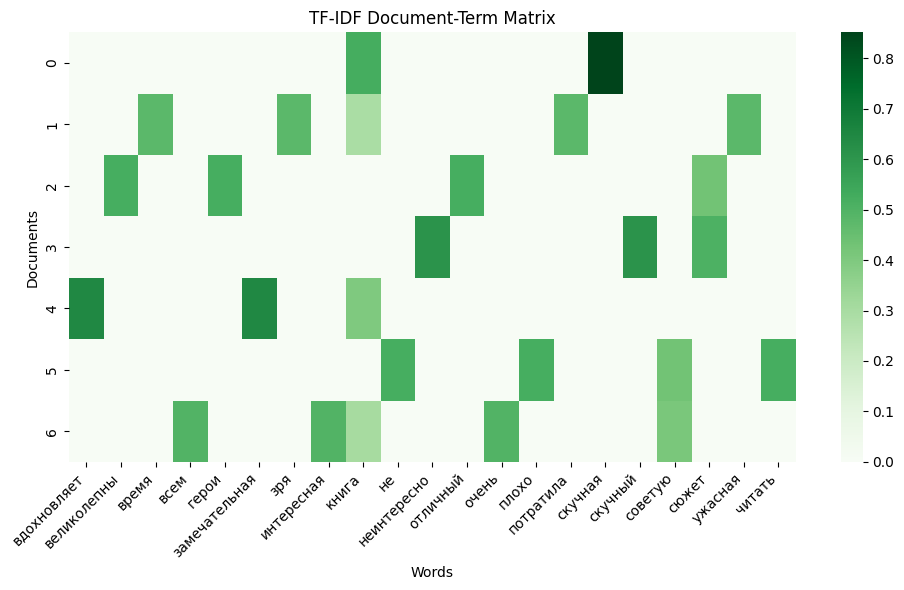

In [69]:
#визуализация. чем темнее ячейка, тем слово значимее для контекста
plt.figure(figsize=(10, 6))
sns.heatmap(X_tfidf, xticklabels=tfidf_vectorizer.get_feature_names_out(), yticklabels=df.index, cmap='Greens')
plt.title('TF-IDF Document-Term Matrix')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()